In [1]:
from simMat_funcs import *

In [2]:
dataPath = '../Data/'
simMat_yr = np.load(dataPath + 'history_simMat.npy')

elemList = []
with open(f"{dataPath}/ElementList.txt",'r') as f:
    for line in f:
        elemList.append(line.strip())
            
min_yr = 1771
print(simMat_yr.shape)

(247, 103, 103)


# Meaning of 0s and nans

If element exists to this year, but similarity == 0, plot 0.

If element doesn't exist, then similarity == 0, but plot nan.

## Let's produce code to convert these data, into specific plots for each element.


In [45]:
def plot_SimPTBar(simMat_yr,year,element,min_yr):
    # Select simMat for this year
    arr_yr = simMat_yr[year-min_yr].copy()
    # Select a particular element
    X,Y = TP[element]

    # Generate a list of elements present at the given year
    c,elems_yr = 0,[]  # counter, element list
    for e in TP.keys():
        if e in elemList:
            # If all entries at this place are nan: they don't exist
            if (~np.isnan(arr_yr[:,c].all())): 
                c+=1
                elems_yr.append(e)

    # Select the array for the given element, for the given year
    arr_thisElem = arr_yr[:,elems_yr.index(element)]
    arr_thisElem[elems_yr.index(element)] = 0  # Remove this element's value, so it's white as well

    img = np.zeros((7,32))
    mask = img.copy()
    # Create a mask to wipe out nan entries, so they appear as white
    c = 0
    for e in elems_yr:
        x,y = TP[e]
        mask[x,y] = 1
        if ~np.isnan(arr_thisElem[c]):
            img[x,y] = arr_thisElem[c]
            c+=1

    mask[X,Y] = 0
    with np.errstate(invalid='ignore',divide='ignore'):
        img /= mask

    # Plot similarity PT for elem
    fig = plt.figure(figsize=(18,7))
    gs = fig.add_gridspec(2,2,  width_ratios=(99, 1), height_ratios=(6, 4),
                  #    left=0, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0.2)

    ax = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, :])
    cbar = fig.add_subplot(gs[0,1])

    cmap = sns.color_palette("magma", as_cmap=True)
    sns.heatmap(img,ax=ax,cbar_ax=cbar,
                vmin=0,vmax=np.nanmax(img),
                cmap=cmap)

    ax.set_title(f'Replaceability of {element} in chemical formulas, Year = {year}', fontsize=20)

    ax.axis('off')

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    #ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    # Plot barplot
    df = (pd.Series(arr_thisElem,index=elems_yr)
          .reset_index()
          .rename(columns={'index':'Element',
                           0:'Occurences'}))
    df = df[df.Element != element]

    df['color'] = (df['Occurences']/df['Occurences'].max()).apply(cmap)
    ax1.bar(x=range(df.shape[0]) ,
            height=df['Occurences'],
            color=df['color'],edgecolor = "k")

    ax1.set_xticks(range(df.shape[0]))
    ax1.set_xticklabels(df['Element'],fontsize=8)
    ax1.set_xlim(-1,df.shape[0])

    # Put the element's symbol at it's position
    if len(element)==1:  tab = 0.2
    else:                tab = 0.02
    ax.text(Y+tab,X+0.7,element,fontsize=17)

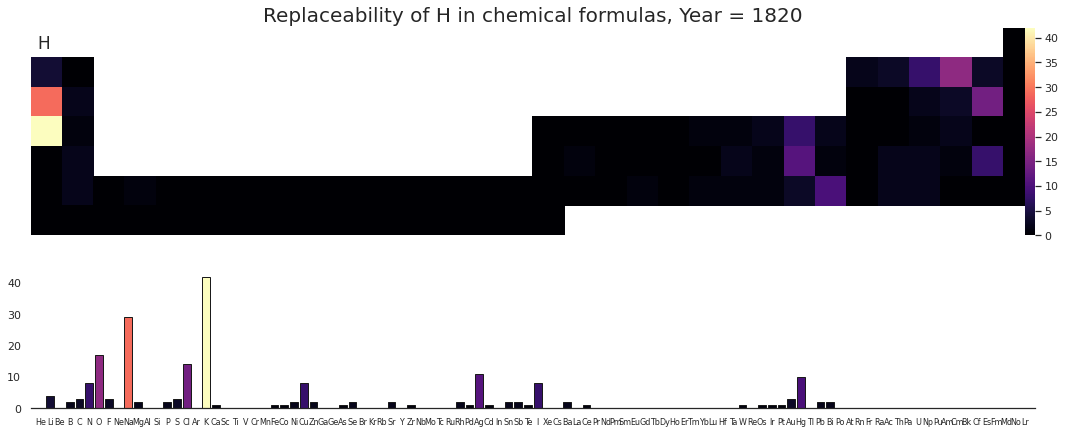

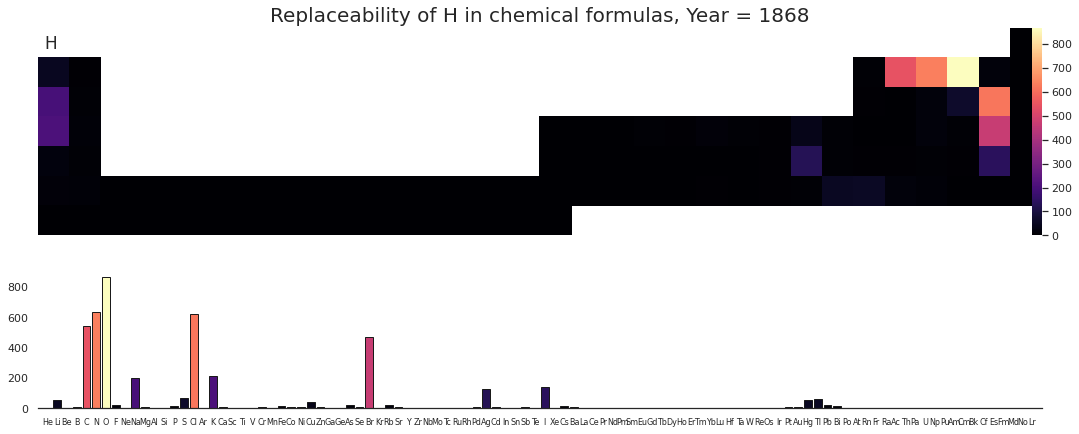

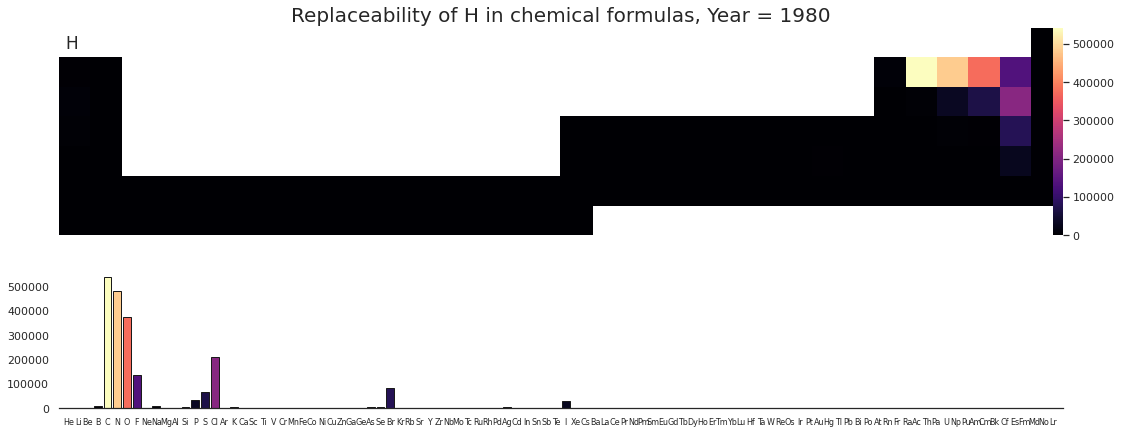

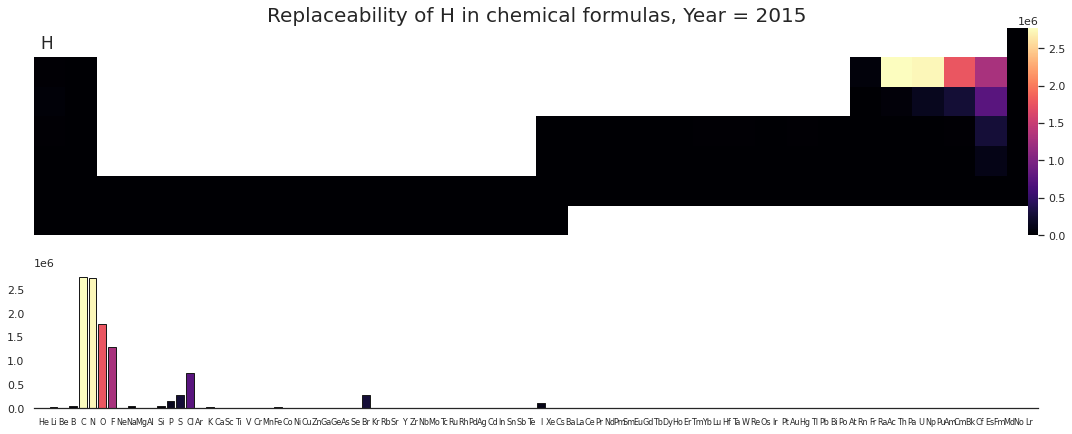

In [39]:
for y in [1820,1868,1980,2015]:
    plot_SimPTBar(simMat_yr,y,'H',min_yr)

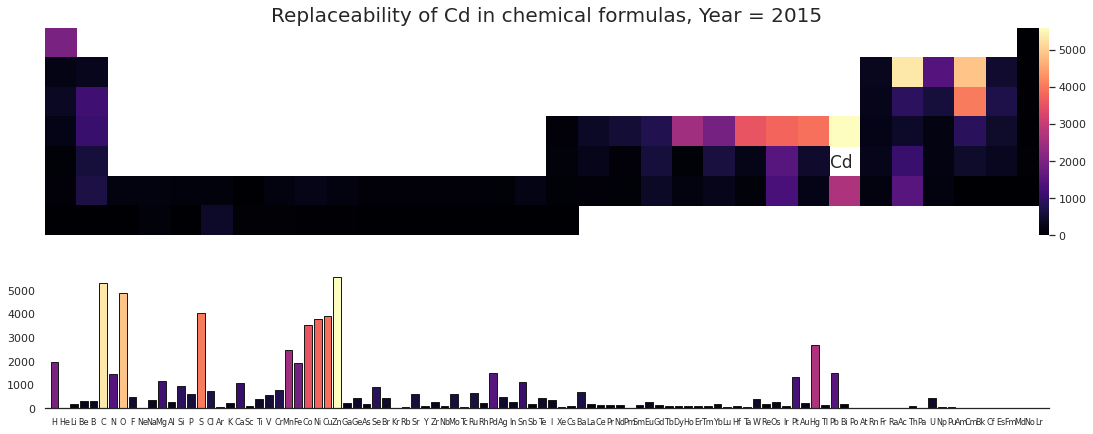

In [56]:
plot_SimPTBar(simMat_yr,2015,'Cd',min_yr)

# Plot similarity matrices for a given year.

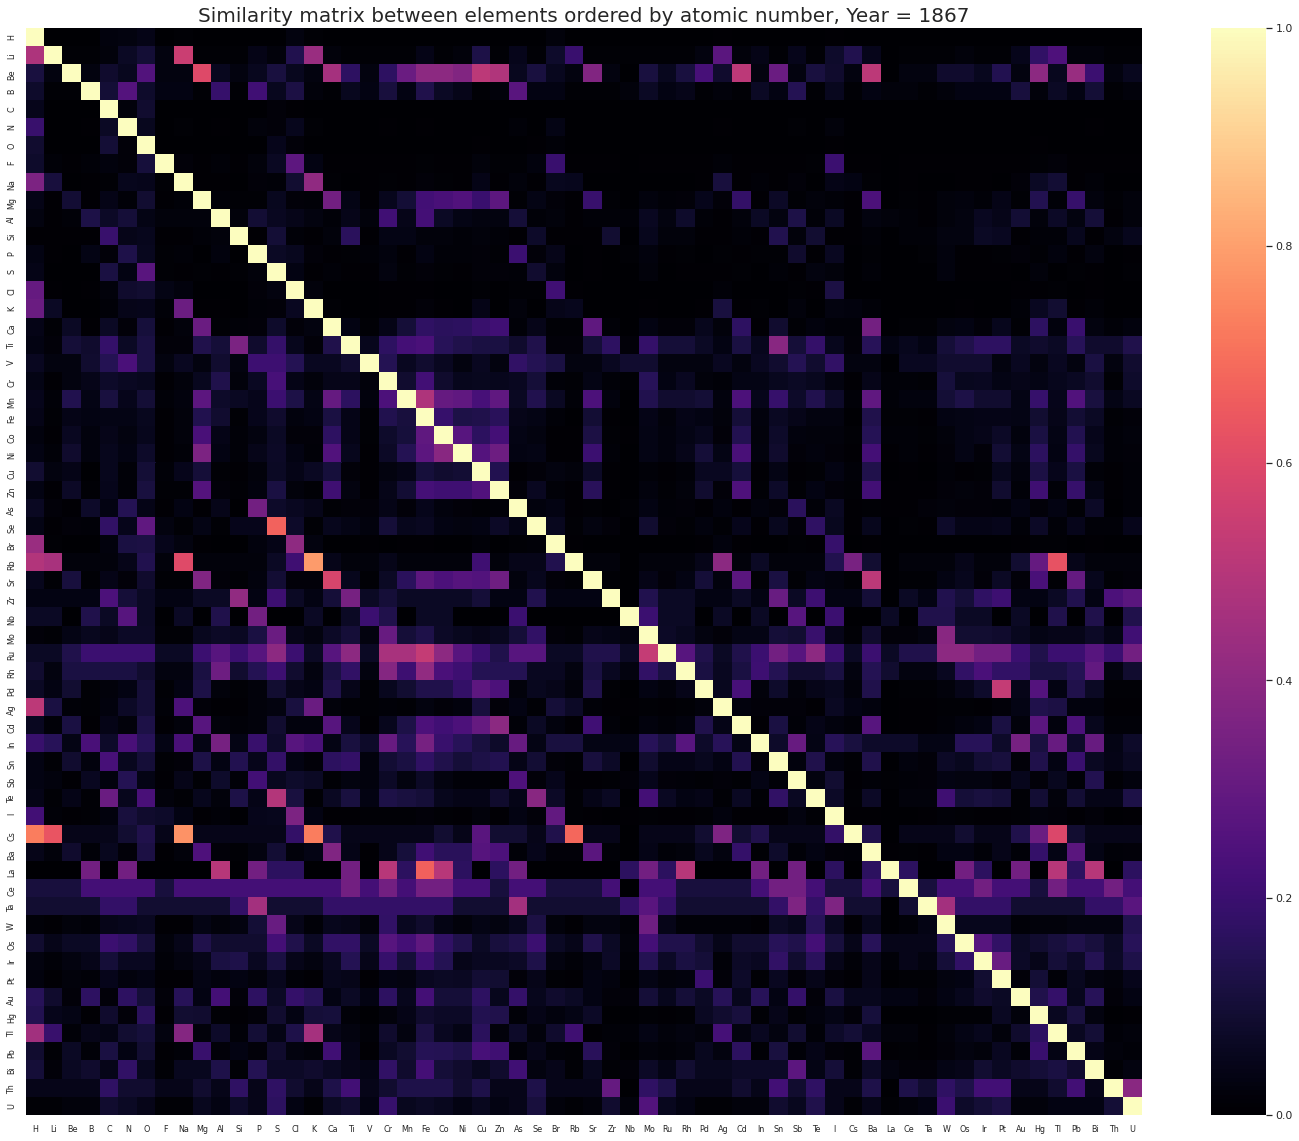

In [113]:
def plot_simMat_yr(year,min_yr=min_yr,save=False):
    
    diag = np.diag(simMat_yr[year - min_yr])
    with np.errstate(invalid='ignore',divide='ignore'):
        m = simMat_yr[year - min_yr]/diag
        m = m.T/(diag!=0)
    # Find which elements don't exist, to drop respective rows and cols
    isn = ~np.isnan(m).all(axis=0)
    m = m[isn][:,isn]
    #m = np.nan_to_num(m,0)
    
    fig,ax = plt.subplots(figsize=(25,20))
    ax.set_title(f"Similarity matrix between elements ordered by atomic number, Year = {year}",
                 fontsize=20)
    sns.heatmap(m,ax=ax,
                cmap=sns.color_palette("magma", as_cmap=True))
    
    labl = [e for i,e in enumerate(TP.keys()) if (e in elemList and isn[i])]
    #labl = [e for e in TP.keys() if e in elemList]
    tick = [i+0.5 for i in range(len(labl))]
    ax.set_xticks(tick)
    ax.set_yticks(tick)
    ax.set_xticklabels(labl,fontsize=8)
    ax.set_yticklabels(labl,fontsize=8)
    
    if save: plt.savefig(save,dpi=400,bbox_inches='tight')

plot_simMat_yr(1867,save='../Data/Results/SM_1867.png')

In [97]:
year=1867

diag = np.diag(simMat_yr[year - min_yr])
with np.errstate(invalid='ignore',divide='ignore'):
    m = simMat_yr[year - min_yr]/diag
    m = m.T/(diag!=0)
    
isn = ~np.isnan(m).all(axis=0)


#m[np.where(np.isnan(m),1,0)]=0
m

array([[1.        ,        nan, 0.00250742, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.48039216,        nan, 1.        , ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [102]:
np.where(np.isnan(m),0,1)

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

array([[1.        , 0.        , 0.00250742, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.48039216, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [74]:
isn
















array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False])